#  Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [2]:
# Load .env environment variables
load_dotenv("envi.env")

True

#  Part 1 - Personal Finance Planner

## Collect Crypto Prices Using the requests Library

In [3]:
 # Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
 # Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
response_data_btc = requests.get(btc_url).json()
print(json.dumps(response_data_btc, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18613193,
            "total_supply": 18613193,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 33536.0,
                    "volume_24h": 51051172925,
                    "market_cap": 626729781355,
                    "percentage_change_1h": 0.648790655619104,
                    "percentage_change_24h": 10.2310544415781,
                    "percentage_change_7d": -5.7636791932097,
                    "percent_change_1h": 0.648790655619104,
                    "percent_change_24h": 10.2310544415781,
                    "percent_change_7d": -5.7636791932097
                },
                "CAD": {
                    "price": 42996.5056,
                    "volume_24h": 65452708807.1425,
                    "ma

In [6]:
 # Fetch current BTC price in USD and CAD
    
### Currency = USD
usd_price_btc =response_data_btc['data']['1']['quotes']['USD']['price']
print(usd_price_btc)

### Currency = CAD
cad_price_btc =response_data_btc['data']['1']['quotes']['CAD']['price']
print(cad_price_btc)

33536.0
42996.5056


In [7]:
# Fetch current ETH price
# YOUR CODE HERE!]
# getting the content of eth
response_data_eth = requests.get(eth_url).json()
print(json.dumps(response_data_eth, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114443549,
            "total_supply": 114443549,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1348.05,
                    "volume_24h": 33013952486,
                    "market_cap": 154790147167,
                    "percentage_change_1h": -0.604039101835712,
                    "percentage_change_24h": 8.28957101369591,
                    "percentage_change_7d": -2.72762316677948,
                    "percent_change_1h": -0.604039101835712,
                    "percent_change_24h": 8.28957101369591,
                    "percent_change_7d": -2.72762316677948
                },
                "CAD": {
                    "price": 1728.334905,
                    "volume_24h": 42327188482.3006,
               

In [8]:
 # Fetch current eth price in USD & CAD
# Currency = USD
usd_price_eth =response_data_eth['data']['1027']['quotes']['USD']['price']
print(usd_price_eth)

# Currency = CAD
cad_price_eth =response_data_eth['data']['1027']['quotes']['CAD']['price']
print(cad_price_eth)



1348.05
1728.334905


In [9]:
# Compute current value of my crpto
my_btc_value = float(usd_price_btc )  * float(my_btc)
print(my_btc_value)
my_eth_value = float(usd_price_eth) * float(my_eth)
print(my_eth_value)

total_crypto = float(my_btc_value) + float(my_eth_value)
total_crypto

40243.2
7144.665


47387.865

In [10]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40243.20
The current value of your 5.3 ETH is $7144.66


#  Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [11]:
 # Current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
api_key = os.getenv("QUANDL_API_KEY")
type(alpaca_api_key)

str

In [13]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [14]:
alpaca  = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [15]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-27", tz="America/New_York").isoformat()

In [16]:
# Set current amount of shares data
shares_data = {
    "shares": [my_agg, my_spy]
}

# Set the tickers
tickers = ["AGG", "SPY"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AGG,200
SPY,50


In [17]:
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

In [18]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-01-27 00:00:00-05:00  117.61  117.67  117.04  117.52  3509666  380.22   

                                                             
                             high     low   close    volume  
time                                                         
2021-01-27 00:00:00-05:00  380.32  372.01  374.44  99246554

In [19]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(10)

,AGG,SPY
2021-01-27,117.52,374.44


In [20]:
# Fetch the current closing prices from the DataFrame into  variables for AGG & SPY
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
print(agg_close_price)
print(spy_close_price)
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

117.52
374.44
Current AGG closing price: $117.52
Current SPY closing price: $374.44


In [21]:
# Compute the current value in dollars of the stock portfolio
agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]

total_shares = float(agg_value ) + float(spy_value)

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_value:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_value:0.2f}")
total_shares

The current value of the 200 AGG shares is $23504.00
The current value of the 50 SPY shares is $18722.00


42226.0

#  Savings Health Analysis

In [22]:
# Set monthly household income
monthly_income = 12000


In [23]:
# Set current amount of shares data
savings = {
#    "Amount": [my_btc_value, agg_value]
    "Amount": [total_crypto, total_shares]
}

# Set the tickers
tickers = ["CRYPTO", "SHARES"]

# Create the shares DataFrame
df_savings = pd.DataFrame(savings, index=tickers)

# Display shares data
df_savings

,Amount
CRYPTO,47387.865
SHARES,42226.000


<AxesSubplot:title={'center':'Personal Savings Composition'}, ylabel='Amount'>

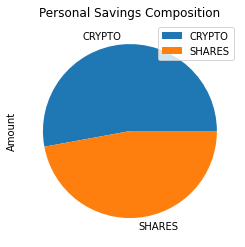

In [24]:
 # Plot savings pie chart
# Create a pie chart to show the proportion of stocks in the portfolio
df_savings.plot.pie(y="Amount", x="shares",title="Personal Savings Composition")

In [25]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares
###total_savings = float(16405.628) + float(40616.500)
print(total_savings)


89613.86499999999


In [26]:
# Validate saving health
print (total_savings)
print(emergency_fund)

#If total savings are greater than the emergency fund, display a message congratulating the person for 
#having enough money in this fund.

if total_savings > emergency_fund : 
    print ("Congratulations! You have enough money in your emergency fund")
#If total savings are equal to the emergency fund, display a message congratulating the person on reaching 
# this financial goal.
elif total_savings == emergency_fund : 
    print("Congratulations!  you have reached your financial goal")
else :
    less_amt = emergency_fund - total_savings
    print (f"You are short of ${less_amt:0.2f} in reaching your savings goals")
    


89613.86499999999
36000
Congratulations! You have enough money in your emergency fund


#  Part 2 - Retirement Planning

## Monte Carlo Simulation

In [27]:
 # Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-01-26', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-01-26', tz='America/New_York').isoformat()

In [28]:
# Set the tickers
tickers = ["AGG", "SPY"]

In [29]:
# Get 1 year's worth of historical data for AAPL
df_stock_data =  alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Drop the time component of the date
df_stock_data.index = df_stock_data.index.date

df_stock_data.head(100)

AGG                                             SPY          \
              open      high       low    close     volume    open    high   
2016-01-26  108.90  108.9950  108.7699  108.900  2023631.0  188.42  190.53   
2016-01-27  108.91  109.0100  108.7200  108.950  1531148.0  189.58  191.56   
2016-01-28  108.99  109.0988  108.8201  109.040  2146566.0  189.96  190.20   
2016-01-29  109.41  109.4800  109.2500  109.320  7404827.0  190.02  193.75   
2016-02-01  109.10  109.2500  108.8415  108.970  4186126.0  192.53  194.58   
...            ...       ...       ...      ...        ...     ...     ...   
2016-06-10  111.54  111.6575  111.4500  111.505  1205373.0  210.46  210.86   
2016-06-13  111.57  111.6700  111.5300  111.610  1521542.0  209.36  210.37   
2016-06-14  111.68  111.7300  111.5500  111.555  1695590.0  208.00  208.74   
2016-06-15  111.67  111.9300  111.6400  111.800  1556713.0  208.54  209.36   
2016-06-16  111.92  112.0699  111.7800  111.860  2314934.0  206.73  208.57   

                                         
                 low   close     volume  
2016-01-26  188.0200  190.18  115312517  
2016-01-27  187.0600  188.12  157060622  
2016-01-28  187.1600  189.14  118949268  
2016-01-29  189.8800  193.69  145410523  
2016-02-01  191.8400  193.69   98369142  
...              ...     ...        ...  
2016-06-10  209.4300  210.06   80491207  
2016-06-13  208.3500  208.44   82156781  
2016-06-14  206.9199  208.08  102129228  
2016-06-15  207.5300  207.75   82945507  
2016-06-16  205.5900  208.42  111547742  

[100 rows x 10 columns]

In [30]:
 # Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
# Set number of simulations
num_sims = 500

# Configure a Monte Carlo simulation to forecast one year daily returns
MC= MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

In [31]:
# Run Monte Carlo simulations to forecast one year daily returns
MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005423,1.004608,1.007031,0.999865,0.997304,0.997445,1.003718,1.004685,1.005109,0.995166,...,1.009441,1.000244,0.996611,0.999766,1.001457,1.002384,1.000306,0.994529,0.999855,0.996530
2,1.011225,0.997658,1.009817,0.998515,1.003141,0.989745,1.007625,0.996861,0.998996,0.993915,...,0.996040,0.998266,1.003092,0.996836,0.998497,1.003938,1.001660,0.993491,0.996379,1.000807
3,1.003664,0.999944,1.009886,1.004293,1.004666,0.992260,1.007380,0.992749,0.994248,0.994310,...,0.992849,1.001705,1.004348,0.998526,1.001533,0.998948,1.005975,0.989077,0.995804,0.995424
4,1.004526,0.996406,1.006855,1.009878,1.004714,0.999785,1.011395,0.993673,1.000747,0.999008,...,0.992286,0.999106,1.010582,0.995556,0.998316,1.003631,1.003960,0.990786,1.002501,0.993511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,14.252235,2.687262,7.201324,9.728324,4.195751,6.120908,11.166959,6.594518,4.702915,13.383762,...,5.449779,7.244289,17.596888,6.784954,7.120054,10.794537,5.519406,10.028650,7.283614,20.215418
7557,14.327970,2.682018,7.242387,9.775061,4.196072,6.128246,11.231873,6.557641,4.680379,13.398819,...,5.470879,7.219734,17.605265,6.843587,7.113198,10.788125,5.515015,10.062151,7.304481,20.189305
7558,14.376586,2.673926,7.229354,9.698526,4.154049,6.164024,11.241847,6.578402,4.671970,13.406168,...,5.441704,7.228982,17.528250,6.835743,7.166907,10.854079,5.471539,10.046254,7.245974,20.207175
7559,14.203913,2.670018,7.215329,9.702350,4.190942,6.193080,11.235982,6.578433,4.687611,13.321625,...,5.456387,7.233227,17.609492,6.813410,7.196799,10.891022,5.414392,10.025293,7.246934,20.245029


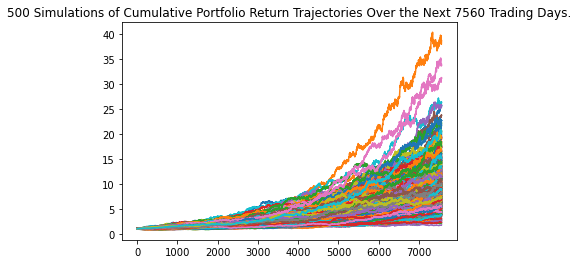

In [32]:
### Plot the Simulated Outcomes for the Next Year (252 Traiding Days
line_plot = MC.plot_simulation()

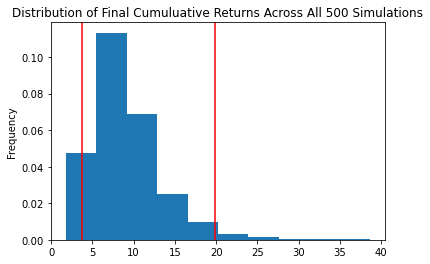

In [33]:
# Plot probability distribution and confidence intervals
dist_plot = MC.plot_distribution()

#  Retirement Analysis

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# Fetch summary statistics from the Monte Carlo simulation results
AGG_SPY_tbl = MC.summarize_cumulative_return()

# Print summary statistics
print(AGG_SPY_tbl)

count           500.000000
mean              9.182508
std               4.495734
min               1.779519
25%               6.164200
50%               8.462262
75%              11.118646
max              38.661539
95% CI Lower      3.747874
95% CI Upper     19.812529
Name: 7560, dtype: float64


###  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment.

In [35]:
 # Set initial investment
initial_investment = 20000


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments
AGG_SPY_ci_lower = round(AGG_SPY_tbl[8]*initial_investment,2)
AGG_SPY_ci_upper = round(AGG_SPY_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${AGG_SPY_ci_lower} and ${AGG_SPY_ci_upper }")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $74957.49 and $396250.57


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [36]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000 investments
AGG_SPY_ci_lower = round(AGG_SPY_tbl[8]*initial_investment,2)
AGG_SPY_ci_upper = round(AGG_SPY_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${AGG_SPY_ci_lower} and ${AGG_SPY_ci_upper }")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $112436.23 and $594375.86
